In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
atac_df = pd.read_csv('./output/ENCSR885DVH_ENCFF625ZBS.interval_counts.200_bp.ORIG.tsv', sep='\t')
rna_df = pd.read_csv('./output/ENCSR885DVH_ENCFF251PDI.interval_counts.200_bp.tsv', sep='\t')
atac_df = atac_df.set_index('interval_id')
rna_df = rna_df.set_index('interval_id')
assert tuple(rna_df.index) == tuple(atac_df.index)
df_joint = pd.DataFrame(
    {
        'RNA-seq': rna_df['n_reads'],
        'ATAC-seq': atac_df['n_reads']
    },
    index = rna_df.index
)

### Snapshot of ATAC-seq data

In [3]:
atac_df

,chromosome,interval_begin,interval_end,n_reads
interval_id,,,,
chr1.1000_1200,chr1,1000,1200,0
chr1.1200_1400,chr1,1200,1400,0
chr1.1400_1600,chr1,1400,1600,0
chr1.1600_1800,chr1,1600,1800,0
chr1.1800_2000,chr1,1800,2000,0
...,...,...,...,...
chrY.57182169_57182369,chrY,57182169,57182369,0
chrY.57182369_57182569,chrY,57182369,57182569,0
chrY.57182569_57182769,chrY,57182569,57182769,0


### Snapshot of ATAC-seq data

In [4]:
rna_df

,chromosome,interval_begin,interval_end,n_reads
interval_id,,,,
chr1.1000_1200,chr1,1000,1200,0
chr1.1200_1400,chr1,1200,1400,0
chr1.1400_1600,chr1,1400,1600,0
chr1.1600_1800,chr1,1600,1800,0
chr1.1800_2000,chr1,1800,2000,0
...,...,...,...,...
chrY.57182169_57182369,chrY,57182169,57182369,0
chrY.57182369_57182569,chrY,57182369,57182569,0
chrY.57182569_57182769,chrY,57182569,57182769,0


### Total counts

In [5]:
atac_total_reads = sum(atac_df['n_reads'])
rna_total_reads = sum(rna_df['n_reads'])
print("Total counts ATAC: ", atac_total_reads)
print("Total counts RNA: ", rna_total_reads)

Total counts ATAC:  5924160
Total counts RNA:  78410031


### Plot distribution of counts for ATAC-seq

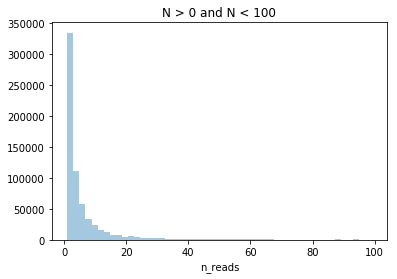

In [6]:
ax = sns.distplot(
    atac_df.loc[(atac_df['n_reads'] > 0) & (atac_df['n_reads'] < 100)]['n_reads'], 
    kde=False
)
ax.set_title('N > 0 and N < 100')
plt.show()

### Plot distribution of counts for RNA-seq

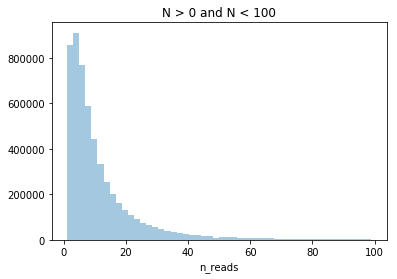

In [7]:
ax = sns.distplot(
    rna_df.loc[(rna_df['n_reads'] > 0) & (rna_df['n_reads'] < 100)]['n_reads'], 
    kde=False
)
ax.set_title('N > 0 and N < 100')
plt.show()

### Scatterplot comparing all intervals

In [12]:
df_no_both_zero = df_joint.loc[
    (df_joint['RNA-seq'] > 0)
    | (df_joint['ATAC-seq'] > 0)
]
df_no_both_zero

,RNA-seq,ATAC-seq
interval_id,,
chr1.9800_10000,12,0
chr1.10000_10200,34,0
chr1.10200_10400,34,0
chr1.10400_10600,33,4
chr1.10600_10800,17,7
...,...,...
chrY.56886888_56887088,17,0
chrY.56887088_56887288,14,0
chrY.56887288_56887488,4,0


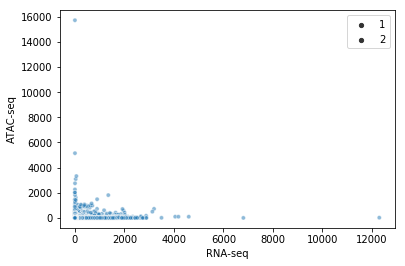

In [18]:
ax = sns.scatterplot(
    data=df_no_both_zero, 
    x='RNA-seq', 
    y='ATAC-seq',
    alpha=0.5,
    size=2
)
plt.show()

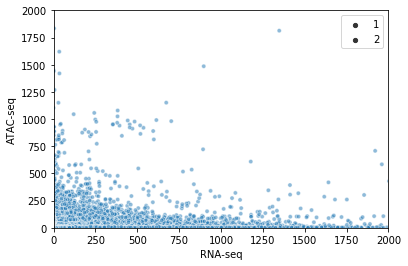

In [19]:
ax = sns.scatterplot(
    data=df_no_both_zero, 
    x='RNA-seq', 
    y='ATAC-seq',
    alpha=0.5,
    size=2
)
ax.set_xlim((0,2000))
ax.set_ylim((0,2000))
plt.show()

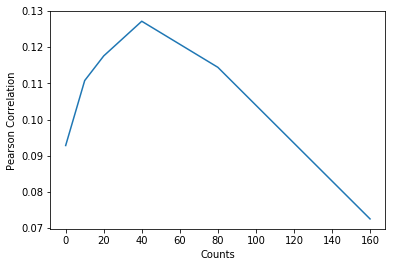

In [42]:
import scipy

p_corrs = []
s_corrs = []
n_counts = [0, 10, 20, 40, 80, 160]
p_pvals = []
s_pvals = []
for n in n_counts:
    df_restrict = df_joint.loc[
        (df_joint['RNA-seq'] > n)
        & (df_joint['ATAC-seq'] > n)
    ]
    p_corr, p_pval = scipy.stats.pearsonr(
        df_restrict['RNA-seq'],
        df_restrict['ATAC-seq']
    )
    s_corr, s_pval = scipy.stats.spearmanr(
        df_restrict['RNA-seq'],
        df_restrict['ATAC-seq']
    )
    p_corrs.append(p_corr)
    s_corrs.append(s_corr)
    p_pvals.append(p_pval)
    s_pvals.append(s_pval)
    pvals.append(pval)
    
plt.plot(n_counts, p_corrs)
plt.xlabel('Counts')
plt.ylabel('Pearson Correlation')
plt.show()

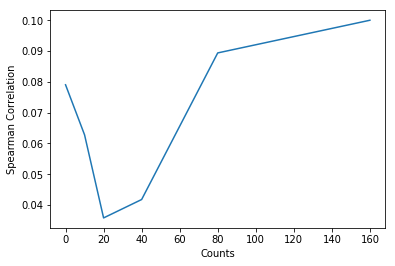

In [43]:
plt.plot(n_counts, s_corrs)
plt.xlabel('Counts')
plt.ylabel('Spearman Correlation')
plt.show()

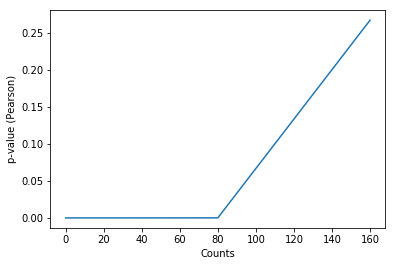

In [44]:
plt.plot(n_counts, p_pvals)
plt.xlabel('Counts')
plt.ylabel('p-value (Pearson)')
plt.show()

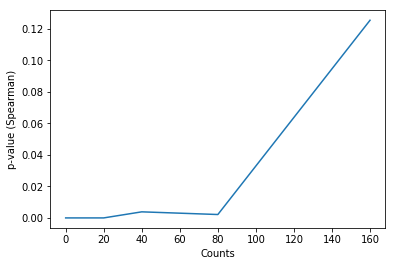

In [45]:
plt.plot(n_counts, s_pvals)
plt.xlabel('Counts')
plt.ylabel('p-value (Spearman)')
plt.show()